In [1]:
# Funktion för att läsa in "Datapoints.txt" och spara raderna i en lista
def läs_in_datapoints(filename):
    rader = []  # Skapa en tom lista för att spara datapunkter
    try:
        with open(filename, 'r', encoding='utf-8') as file:
            for rad in file:
                rader.append(rad.strip())  # Ta bort extra blanksteg och nya rader
    except FileNotFoundError:
        print(f"Filen {filename} hittades inte.")
    except Exception as e:
        print(f"Ett fel uppstod: {e}")
    
    return rader

# Använd funktionen
filnamn = 'Datapoints.txt'
datapoints = läs_in_datapoints(filnamn)

# Skriv ut innehållet
for punkt in datapoints:
    print(punkt)


(width (cm), height (cm), label (0-pichu, 1-pikachu))
21.959384499160468, 31.23956701424158, 0
23.63591632187622, 36.46821490673444, 1
17.714056417303343, 31.44170391314962, 0
21.78020031891186, 33.213397759738264, 1
25.20630552859312, 36.558816149350534, 1
19.332572350434354, 32.25325633655492, 0
24.73645685241186, 35.33291181124776, 1
23.79257560586339, 38.10372825362463, 1
24.557612968127465, 36.73144402805611, 1
20.191281253428173, 35.06966921830237, 0
25.813562951888365, 35.561029988644336, 1
24.923378667802954, 34.463907946680294, 1
25.311244044578427, 34.117212558131975, 1
22.819091361866796, 34.25516433025548, 1
19.639358214988224, 34.56117030001663, 0
18.341233265627693, 31.399261188293124, 0
22.723629043769336, 34.83845262048311, 1
25.82936770950206, 33.16210202637511, 1
20.23890182459327, 32.78945132868386, 0
17.905128921789093, 28.88813385482529, 0
24.385289647525166, 37.335669057387726, 1
26.525412887538252, 35.2192205449002, 1
19.299333494980544, 30.486337996080024, 0
20.

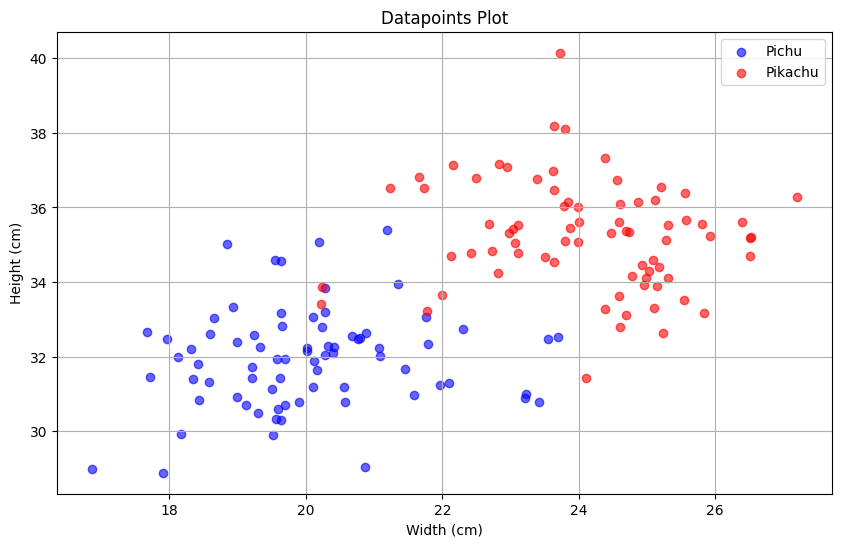

In [3]:
import matplotlib.pyplot as plt

# Funktion för att läsa in datapunkter från filen och spara dem i en lista
def läs_in_datapoints(filename):
    datapoints = []
    try:
        with open(filename, 'r', encoding='utf-8') as file:
            next(file)  # Ignorera den första raden (header)
            for rad in file:
                # Dela upp raden i komponenter och konvertera till rätt typ
                delar = rad.strip().split(', ')
                width = float(delar[0])
                height = float(delar[1])
                label = int(delar[2])
                datapoints.append((width, height, label))
    except FileNotFoundError:
        print(f"Filen {filename} hittades inte.")
    except Exception as e:
        print(f"Ett fel uppstod: {e}")

    return datapoints

# Använd funktionen för att läsa in datapunkterna
filnamn = 'Datapoints.txt'
datapoints = läs_in_datapoints(filnamn)

# Separera datapunkterna baserat på klassen
pichu = [(d[0], d[1]) for d in datapoints if d[2] == 0]
pikachu = [(d[0], d[1]) for d in datapoints if d[2] == 1]

# Plotta datapunkterna
plt.figure(figsize=(10, 6))

# Plotta pichu (label 0) i blått
if pichu:
    plt.scatter(*zip(*pichu), color='blue', label='Pichu', alpha=0.6)

# Plotta pikachu (label 1) i rött
if pikachu:
    plt.scatter(*zip(*pikachu), color='red', label='Pikachu', alpha=0.6)

# Inställningar för plotten
plt.title('Datapoints Plot')
plt.xlabel('Width (cm)')
plt.ylabel('Height (cm)')
plt.legend()
plt.grid(True)
plt.show()


Ett fel uppstod: could not convert string to float: '1. (25'


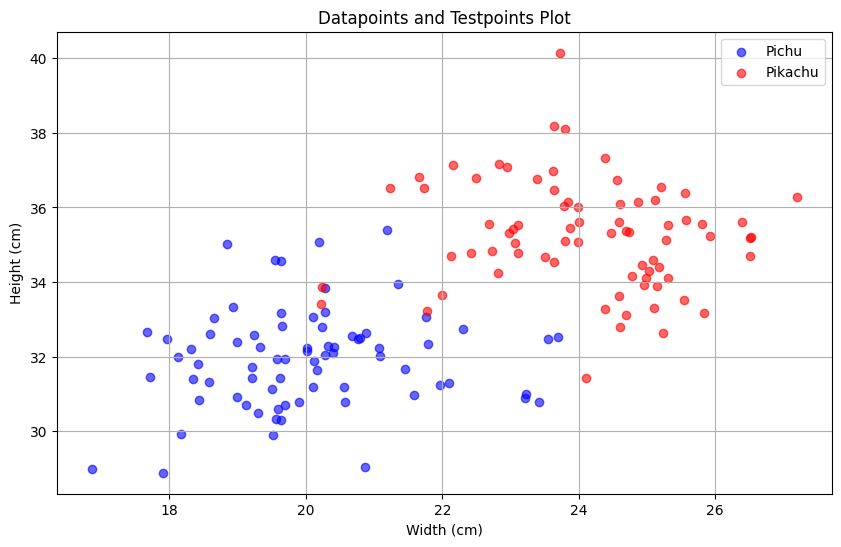

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Funktion för att läsa in datapunkter från en fil
def läs_in_datapoints(filename):
    datapoints = []
    try:
        with open(filename, 'r', encoding='utf-8') as file:
            next(file)  # Ignorera den första raden (header)
            for rad in file:
                delar = rad.strip().split(', ')
                width = float(delar[0])
                height = float(delar[1])
                label = int(delar[2])
                datapoints.append((width, height, label))
    except FileNotFoundError:
        print(f"Filen {filename} hittades inte.")
    except Exception as e:
        print(f"Ett fel uppstod: {e}")

    return datapoints

# Funktion för att beräkna avståndet mellan två punkter
def beräkna_avstånd(punkt1, punkt2):
    return np.sqrt((punkt1[0] - punkt2[0]) ** 2 + (punkt1[1] - punkt2[1]) ** 2)

# Använd funktionen för att läsa in datapunkterna
datapoints = läs_in_datapoints('Datapoints.txt')
testpoints = läs_in_datapoints('Testpoints.txt')

# Separera datapunkterna baserat på klassen
pichu = [(d[0], d[1]) for d in datapoints if d[2] == 0]
pikachu = [(d[0], d[1]) for d in datapoints if d[2] == 1]

# Plotta datapunkterna
plt.figure(figsize=(10, 6))

# Plotta pichu (label 0) i blått
if pichu:
    plt.scatter(*zip(*pichu), color='blue', label='Pichu', alpha=0.6)

# Plotta pikachu (label 1) i rött
if pikachu:
    plt.scatter(*zip(*pikachu), color='red', label='Pikachu', alpha=0.6)

# Plotta testpunkterna i grönt
if testpoints:
    test_x, test_y = zip(*[(tp[0], tp[1]) for tp in testpoints])
    plt.scatter(test_x, test_y, color='green', label='Testpoints', alpha=0.6)

# Beräkna avstånd och skriv ut
for i, testpunkt in enumerate(testpoints):
    for j, datapunkt in enumerate(datapoints):
        avstånd = beräkna_avstånd(datapunkt[:2], testpunkt[:2])  # Använd endast width och height
        print(f"Avstånd mellan datapunkt {j} och testpunkt {i}: {avstånd:.2f} cm")

# Inställningar för plotten
plt.title('Datapoints and Testpoints Plot')
plt.xlabel('Width (cm)')
plt.ylabel('Height (cm)')
plt.legend()
plt.grid(True)
plt.show()
